In [1]:
import sys
sys.path.append('../')
from utils import *
from processing import *
import subspaceMSI
from signal_model import *
import argparse
import logging
import pickle
from tensorflow import keras 


          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
bcorr,  fastclean,  Fitter,  gaussenh,  Linear_prediction,  Peaks,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
diagonal_2DMS,  FTMS_calib,  PhaseMS, 


In [2]:
with open('E:/3DCoronal/decoded_data_new/coronal3D_latent32_epoch10_slide3_5_R00_encoded_pred.pkl', 'rb') as f:
    encoded_pred = pickle.load(f)

In [3]:
decoder_dir="D:/Work/projects/DeepMSI/saved_model/coronal3D_latent32_epoch10_decoder"
regressor_dir="D:/Work/projects/DeepMSI/saved_model/coronal3D_latent32_epoch10_regressor"

decoder = keras.models.load_model(decoder_dir)
model_lp = keras.models.load_model(regressor_dir)

In [4]:
average_sp,peak_list_avg,peak_data_pred_decoded = decodeAvgSpectraPeaks(encoded_pred, decoder, (150,1100))

  0%|                                                                                          | 0/353 [00:00<?, ?it/s]

(452361,)
propogating encoded intensities of 3544 peaks...


100%|██████████████████████████████████████████████████████████████████████████████| 353/353 [1:36:55<00:00, 16.47s/it]


In [4]:
import random
random.seed(19)
rows_id = random.sample(range(0, encoded_pred.shape[0]), int(encoded_pred.shape[0]*0.1))

In [5]:
encoded_pred[rows_id]

array([[ 8.4253609e+04, -4.2224848e+04,  2.7302793e+04, ...,
        -2.5668570e+04,  2.1869936e+04,  4.9657871e+04],
       [ 1.4551316e+04, -5.7967173e+03,  2.9717592e+04, ...,
        -2.9521112e+02, -5.9689520e+02,  2.5840173e+03],
       [ 2.3011994e+04, -5.8685497e+01,  3.5379371e+04, ...,
        -9.0481572e+03, -1.0538218e+04, -8.6155615e+03],
       ...,
       [ 2.9459541e+04, -2.4382881e+03,  3.3501953e+04, ...,
        -6.6674053e+03, -3.5807791e+02,  4.0030457e+03],
       [ 9.4126777e+03,  1.0220361e+04,  2.8035689e+04, ...,
        -3.1389211e+03,  2.4759854e+03,  2.6922385e+03],
       [ 3.9413316e+04, -3.7866741e+03,  4.3356418e+04, ...,
        -2.5034795e+03, -4.8816543e+03,  6.0901428e+02]], dtype=float32)

In [7]:
encoded = encoded_pred[rows_id]

mz, sp, _ = decodeSpectra('./temp_fid', encoded[0].reshape(1,-1), decoder, (150,1100))
average_sp = np.zeros(sp.shape)

# for i in tqdm(range(0, encoded.shape[0], 128)):
#     mz, sp_decoded, _ = decodeSpectra('./temp_fid', encoded[i:i+128], decoder, (150,1100))
#     average_sp += np.sum(sp_decoded,0)
# average_sp = average_sp[0]/encoded.shape[0]

In [9]:
groups_show = ['slide1_2_R00','slide1_2_R01','slide1_2_R02','slide1_2_R03','slide1_2_R04','slide1_2_R05','slide1_2_R06',
              'slide1_2_R07','slide1_2_R08','slide3_5_R00','slide3_5_R10','slide3_5_R01','slide3_5_R02','slide3_5_R03',
              'slide3_5_R04','slide4_6_R00','slide4_6_R11','slide4_6_R01','slide4_6_R02','slide4_6_R03','slide4_6_R04',
              'slide3_5_R05','slide3_5_R06','slide3_5_R07','slide3_5_R08','slide3_5_R09','slide4_6_R05',
              'slide4_6_R06','slide4_6_R07','slide4_6_R08','slide4_6_R09','slide4_6_R10','slide7_R00','slide7_R01']
avg_spec_recon = []
avg_spec_orig = []
for group in groups_show:
    with open('F:/3DCoronal/decoded_data_new/coronal3D_latent32_epoch10_{}_avgsp_decoded.pkl'.format(group), 'rb') as fp:
        avg_spec_recon.append(pickle.load(fp))

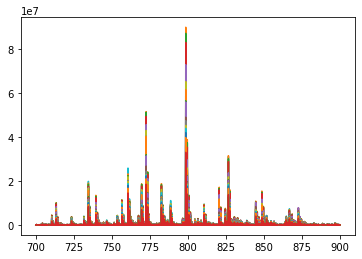

In [14]:
mz_filter = (mz>700)&(mz<900)
for spec in avg_spec_recon:
    plt.plot(mz[mz_filter],spec[mz_filter],rasterized=True)
plt.savefig('../figures/avg_spec_coronal3D_decoded.pdf')

In [34]:
with open('E:/3DCoronal/decoded_data_new/coronal3D_latent32_epoch10_slide3_5_R00_avgsp_decoded.pkl', 'rb') as fp:
    average_sp_all =pickle.load(fp)

In [45]:
from scipy.stats import median_abs_deviation as mad

p1=peak_detection(mz, average_sp, prominence = mad(average_sp)*10, threshold = mad(average_sp)*10)
p2=peak_detection(mz, average_sp_all, prominence = mad(average_sp_all)*10, threshold = mad(average_sp_all)*10)


In [5]:
with open('E:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R10_propagated_decoded2.pkl', 'wb') as fp:
    pickle.dump(peak_data_pred_decoded, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
with open('E:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R10_propagated_decoded2.pkl', 'rb') as fp:
    peak_list =pickle.load(fp)

In [6]:
with open('E:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R10_propagated_decoded.pkl', 'rb') as fp:
    peak_data_pred_decoded = pickle.load(fp)

In [54]:
#coord = peak_data_pred_decoded['coordinates']
coords = [tuple([1,i]) for i in range(len(imzml_data.coords))]

In [56]:
def pklist2imzML(peak_list_name,coords):

    """
    """
    with open(peak_list_name+'.pkl', 'rb') as fp:
        peak_list = pickle.load(fp)

    with ImzMLWriter(peak_list_name+'.imzML') as w:
	        
	    for i in range(1,len(peak_list)+1):
	        
	        # writes data to the .ibd file
	        #print(i)
	        if peak_list[i]['mz'].size >0:
	            
	            w.addSpectrum(mzs = peak_list[i]['mz'],intensities = peak_list[i]['intensity'],
	                                    coords = tuple(coords[i-1]))

In [57]:
pklist2imzML('coronal3D_latent32_epoch10_slide3_5_R10_propagated_decoded2',coords)

In [58]:
imzml_data = loadimzMLData('coronal3D_latent32_epoch10_slide3_5_R10_propagated_decoded2.imzML')

c:\users\richard\appdata\local\programs\python\python38\lib\site-packages\pyimzml\ontology\ontology.py:86: UserWarning: Accession IMS:1000491 found with incorrect name "line scan left right". Updating name to "linescan left right".
  warn(


TODO: convert indices into real world coordinates
loaded spectra
file loaded


In [49]:
coords = [tuple([1,i]) for i in range(len(imzml_data.coords))]

In [59]:
intens_mtx = getIntensMtxData(imzml_data, (400,1100), 0.2, ppm=3)

  0%|▏                                                                          | 354/168602 [00:00<01:34, 1774.68it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:32<00:00, 1831.70it/s]


In [60]:
intens_mtx

,400.273693,400.278496,400.285701,400.340944,400.773545,400.780759,400.790377,401.240315,401.249945,401.278836,...,1091.697971,1092.707163,1094.275225,1094.472212,1096.417715,1097.418101,1097.951575,1098.406219,1099.494177,1099.586538
0,53543.691406,79564.046875,74600.328125,1356.962036,14632.681641,32826.554688,31088.394531,4962.194336,3491.370605,5926.122070,...,1775.035156,2319.741943,2596.361328,5180.066406,1253.084229,5794.016602,4297.298828,3186.041748,5551.112793,9281.802734
1,54288.742188,86430.421875,79263.578125,1303.146240,14551.361328,35288.921875,32909.625000,5664.500488,3865.389160,6487.462402,...,2069.384277,2272.174072,2371.919678,5274.793945,1319.058350,5504.719238,4185.109863,3589.165039,5837.380371,8749.000977
2,70905.039062,71605.234375,99814.242188,2066.222656,27687.552734,49251.359375,63722.152344,8657.905273,6953.196777,11570.505859,...,7242.016602,3513.674805,4530.941895,8250.521484,3455.473877,15530.910156,5343.646973,5126.552246,8469.146484,14199.807617
3,75750.593750,85049.460938,103958.960938,803.608215,26043.898438,53109.882812,60149.757812,9123.227539,7029.463379,10813.848633,...,5358.834473,3029.785645,4673.420410,4789.851562,3333.410156,12274.907227,3873.650879,4930.978516,6996.516602,13003.016602
4,34028.121094,48867.953125,52460.718750,1831.760498,11309.078125,26035.472656,26914.232422,3698.095703,2588.790039,5083.515137,...,4431.931152,2828.025635,3875.748779,2465.847412,1319.494995,4997.669434,4302.845215,2272.078857,4124.330566,7314.972168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45178,1697.499268,7357.228027,5045.564941,336.208405,684.827087,4218.274414,2168.744873,775.498474,1266.584839,228.470230,...,3577.604004,2612.311768,2571.217773,549.649475,596.325684,206.535751,3192.384033,567.236755,2916.528076,5519.799805
45179,2299.292725,4892.474609,4313.596680,3247.526367,788.692139,2220.105469,3352.374512,777.136597,314.584503,1128.137695,...,3969.835938,1201.368652,3058.228271,1305.465332,698.206787,2028.932983,5245.129395,1041.057495,2996.880371,3132.547363
45180,32384.794922,75093.203125,60414.468750,1401.623657,8471.449219,27234.986328,22269.712891,3717.715088,2435.246826,4718.613281,...,727.224854,1524.720825,1081.571655,3526.092285,1444.291992,3488.462402,2656.982422,3643.940430,6277.415039,4896.414062
45181,27377.822266,61963.398438,50686.542969,1341.701538,7531.155273,23940.722656,19930.439453,2746.310547,2359.933838,3653.994385,...,935.749634,639.179382,1875.991333,3146.859863,1349.112305,3636.228760,3101.926758,3032.535156,5769.924805,4787.927734


In [14]:
def extractMZFeatures(imzml_dataset, ppm, mz_range, feature_n = 0.05, mz_bins = []):
        
    if len(mz_bins) == 0:
        mz_bins = [mz_range[0]]
        while mz_bins[-1] < mz_range[1]:
            mz_bins.append(mz_bins[-1]+mz_bins[-1]*2*ppm*10**-6)
        
    print('number of mass bins {}'.format(len(mz_bins)))

    count = []
    for i in tqdm(range(len(mz_bins))):
        count.append(imzml_dataset.get_ion_image(mz_bins[i],ppm).xic_to_image(0).astype(bool).sum())
    
    mz_bins_filter = (np.array(count)>=int(imzml_dataset.coords.shape[0]*feature_n))
    mz_bins_use = np.array(mz_bins)[mz_bins_filter]
                
    datacube = imzml_dataset.get_ion_image(mz_bins_use, ppm)
    
    datacube_array = [datacube.xic_to_image(i) for i in range(len(mz_bins_use))]
    datacube_array = np.stack(datacube_array)
        
    return datacube_array, mz_bins_use, count

In [15]:
intens_array, mz_bins_use, c = extractMZFeatures(imzml_data, ppm=3, mz_range=(400,1100), feature_n=0.2)

  0%|                                                                           | 149/168602 [00:00<01:53, 1479.20it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:19<00:00, 2115.32it/s]


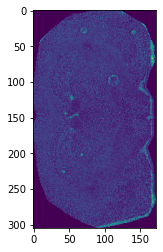

In [20]:
plt.imshow(intens_array[1324])

In [27]:
intens_array[:,imzml_data.coords[:,:2]]

MemoryError: Unable to allocate 323. GiB for an array with shape (45183, 2, 2793, 172) and data type float64

In [28]:
intens_array.shape

(2793, 305, 172)

In [48]:
intens_array[1][0,86]

79564.046875

In [46]:
imzml_data.coords[:,:2][0]

array([ 0, 86])

In [44]:
imzml_data.coords[:,:2]

(45183, 2)